# Phase 3

1. Classification model to classify voter category (always, sporadic, rarely/never) -- (Possible models: Logistic regression, kNN, Decision Tree)
2. Statistical analysis of significance of poll question answers in determining voter category. (Specifically analyzing questions related to people not voting to determine the reasons why people don't vote/what are the biggest barriers to voting.)

Questions for reviewers:
1. I'm not sure what the best way to go about the analysis of the poll questions. Would using them in a model to predict voter category and then looking at feature importance be good? Should we be using hypothsis testing?
2. We also changed out dataset and redid phase 2. Do we need to notify anyone of this change (i've included our new phase 2 below)? 

# Phase 2

## Research Questions:
- What are the biggest barriers to voting?
- Who is most likely to be a voter? (Can we predict who is and who is not a voter?)

## Data Collection and Cleaning

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data dowloaded from fivethirtyeight: https://github.com/fivethirtyeight/data/tree/master/non-voters

In [31]:
data = pd.read_csv('nonvoters_data.csv')
data['Q26']

0       1
1       1
2       1
3       1
4       1
       ..
5831    1
5832    1
5833    1
5834    1
5835    1
Name: Q26, Length: 5836, dtype: int64

Rename columns:

In [3]:
data.columns = ['Id','weight','Q1','Q2_1','Q2_2','Q2_3','Q2_4','Q2_5','Q2_6','Q2_7','Q2_8','Q2_9',
                'Q2_10','Q3_1','Q3_2','Q3_3','Q3_4','Q3_5','Q3_6','Q4_1','Q4_2','Q4_3','Q4_4','Q4_5',
                'Q4_6','Q5','Q6','Q7','Q8_1','Q8_2','Q8_3','Q8_4','Q8_5','Q8_6','Q8_7','Q8_8',
                'Q8_9','Q9_1','Q9_2','Q9_3','Q9_4','Q10_1','Q10_2','Q10_3','Q10_4','Q11_1','Q11_2',
                'Q11_3','Q11_4','Q11_5','Q11_6','Q14','Q15','Q16','Q17_1','Q17_2','Q17_3','Q17_4',
                'Q18_1','Q18_2','Q18_3','Q18_4','Q18_5','Q18_6','Q18_7','Q18_8','Q18_9','Q18_10',
                'Q19_1','Q19_2','Q19_3','Q19_4','Q19_5','Q19_6','Q19_7','Q19_8','Q19_9','Q19_10',
                'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4',
                'Q27_5','Q27_6','Q28_1','Q28_2','Q28_3','Q28_4','Q28_5','Q28_6','Q28_7','Q28_8',
                'Q29_1','Q29_2','Q29_3','Q29_4','Q29_5','Q29_6','Q29_7','Q29_8','Q29_9','Q29_10',
                'Q30', 'Q31', 'Q32', 'Q33', 'age', 'education', 'race', 'gender', 'income','voter_category']

## Data description
- What are the observations (rows) and the attributes (columns)?
    - the rows of the dataset are individuals (voters or non voters) who participated in Ipsos for FiveThirtyEight's poll. the columns Q1 - Q33 corresponds to questions from the poll and the individuals answers to these questions (muliptle choice). The final columns are demographic information about the individuals (age, education, race, gender, income) and the last column is voter stats (always, sporadic, rarely/never)
- Why was this dataset created?
    - this dataset was created by fivethirtyeight in order to analyze why americans don't vote.
- Who funded the creation of the dataset?
    - Ipsos for FiveThirtyEight
- What processes might have influenced what data was observed and recorded and what was not?
    - Minorities (young people, african americans, hispanics... etc.) all are less likely to be sampled. The sampling scheme employed by FiveThrityEight used a sample of U.S. citizens that oversampled young, Black and Hispanic respondents, with 8,327 respondents, and was weighted according to general population benchmarks for U.S. citizens from the U.S. Census Bureau. The sample was then matched to a voter profile through the voter file company Aritotle. Since non-voters are more likely to not be matched to the voter file, respondants were included who did not match the voter file but described themselves as voting “rarely” or “never” in the survey, so as to avoid underrepresenting nonvoters.
- What preprocessing was done, and how did the data come to be in the form that you are using?
    - dropped respondents who were only eligible to vote in three elections or fewer
    - defined those who almost always vote as those who voted in all (or all but one) of the national elections (presidential and midterm) they were eligible to vote in since 2000; those who vote sometimes as those who voted in at least two elections, but fewer than all the elections they were eligible to vote in (or all but one); and those who rarely or never vote as those who voted in no elections, or just one
    - data includes 5,239 respondents who matched to the voter file and whose verified vote history we have, and 597 respondents who did not match to the voter file and described themselves as voting "rarely" or "never," all of whom have been eligible for at least 4 elections
- If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
    - yes they were aware. Poll was conducted by Ipsos for FiveThrityEight and respondent knew that data was to be used for FiveThrityEight's opinion poll analysis blog
- Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
    - https://github.com/fivethirtyeight/data/tree/master/non-voters

## Data Limitations

- One thing we noticed when doing our EDA was that there is a disconnect between some individuals poll responses and their voter file data from Aristotle. People might not always answer polls truthfully. 
- Another possible limitation

## Exploratory Data Analysis

### Stacked Barcharts:
Voter category by demographic info

Voter category and race:
<br>
Largest percentage of people who always vote is white people. Minorities are less likely to vote regularly vote. 

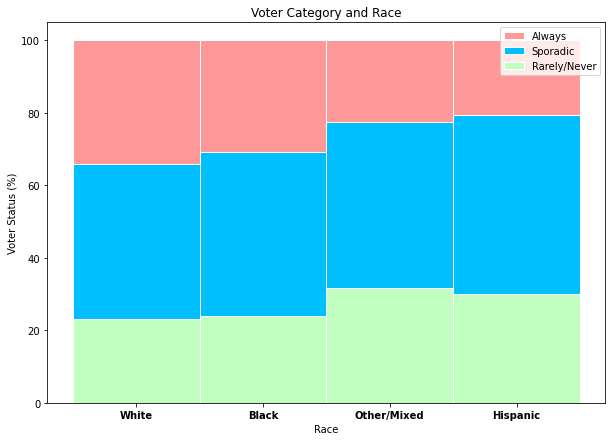

In [5]:
# voter status by race
sub = data[['race', 'voter_category']]
sub.race.unique()
dict = {}
for category in sub.voter_category.unique():
    vals = []
    categorydf = sub[sub['voter_category'] == category]
    for race in sub.race.unique():
        racecat = categorydf[categorydf['race'] == race]
        vals.append(len(racecat))
    dict[category] = vals

# stacked bar plot
x = sub.race.unique()
always = np.array(dict['always'])
sporadic = np.array(dict['sporadic'])
rarely = np.array(dict['rarely/never'])
total = always+sporadic+rarely
proportion_always = np.true_divide(always, total) * 100
proportion_sporadic = np.true_divide(sporadic, total) * 100
proportion_rarely = np.true_divide(rarely, total) * 100

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(x))
barWidth = 1
#plot bars
plt.figure(figsize = (10,7))
ax1 = plt.bar(r, proportion_always, bottom = proportion_sporadic + proportion_rarely, color = colors[0], edgecolor = 'white', width = barWidth, label = 'Always')
ax3 = plt.bar(r, proportion_sporadic, bottom = proportion_rarely, color = colors[1], edgecolor = 'white', width = barWidth, label = 'Sporadic')
ax4 = plt.bar(r, proportion_rarely, color = colors[2], edgecolor = 'white', width=barWidth, label = 'Rarely/Never')
plt.legend()
plt.xticks(r, x, fontweight = 'bold')
plt.xlabel("Race")
plt.ylabel("Voter Status (%)")
plt.title("Voter Category and Race")
plt.show()


Voter Category and Income:
<br>
people who make less and 40k are alot more likely to never vote. 

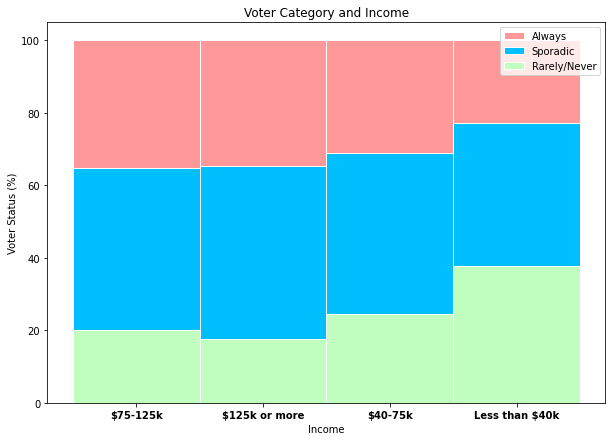

In [6]:
# voter status by income
sub = data[['income', 'voter_category']]
dict = {}
for category in sub.voter_category.unique():
    vals = []
    categorydf = sub[sub['voter_category'] == category]
    for inc in sub.income.unique():
        inccat = categorydf[categorydf['income'] == inc]
        vals.append(len(inccat))
    dict[category] = vals

# stacked bar plot
x = sub.income.unique()
always = np.array(dict['always'])
sporadic = np.array(dict['sporadic'])
rarely = np.array(dict['rarely/never'])
total = always+sporadic+rarely
proportion_always = np.true_divide(always, total) * 100
proportion_sporadic = np.true_divide(sporadic, total) * 100
proportion_rarely = np.true_divide(rarely, total) * 100

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(x))
barWidth = 1
#plot bars
plt.figure(figsize = (10,7))
ax1 = plt.bar(r, proportion_always, bottom = proportion_sporadic + proportion_rarely, color = colors[0], edgecolor = 'white', width = barWidth, label = 'Always')
ax3 = plt.bar(r, proportion_sporadic, bottom = proportion_rarely, color = colors[1], edgecolor = 'white', width = barWidth, label = 'Sporadic')
ax4 = plt.bar(r, proportion_rarely, color = colors[2], edgecolor = 'white', width=barWidth, label = 'Rarely/Never')
plt.legend()
plt.xticks(r, x, fontweight = 'bold')
plt.xlabel("Income")
plt.ylabel("Voter Status (%)")
plt.title("Voter Category and Income")
plt.show()

Voter category and education:
<br>
higher education level is associated with being more likely to vote. 

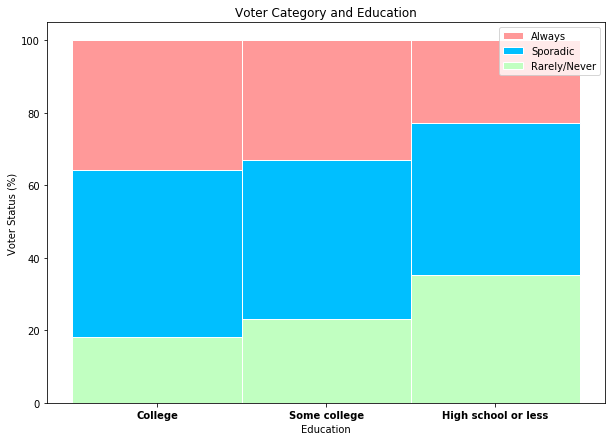

In [73]:
# voter status by demographic info
sub = data[['education', 'voter_category']]
dict = {}
for category in sub.voter_category.unique():
    vals = []
    categorydf = sub[sub['voter_category'] == category]
    for edu in sub.education.unique():
        educat = categorydf[categorydf['education'] == edu]
        vals.append(len(educat))
    dict[category] = vals

# stacked bar plot
x = sub.education.unique()
always = np.array(dict['always'])
sporadic = np.array(dict['sporadic'])
rarely = np.array(dict['rarely/never'])
total = always+sporadic+rarely
proportion_always = np.true_divide(always, total) * 100
proportion_sporadic = np.true_divide(sporadic, total) * 100
proportion_rarely = np.true_divide(rarely, total) * 100

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(x))
barWidth = 1
#plot bars
plt.figure(figsize = (10,7))
ax1 = plt.bar(r, proportion_always, bottom = proportion_sporadic + proportion_rarely, color = colors[0], edgecolor = 'white', width = barWidth, label = 'Always')
ax3 = plt.bar(r, proportion_sporadic, bottom = proportion_rarely, color = colors[1], edgecolor = 'white', width = barWidth, label = 'Sporadic')
ax4 = plt.bar(r, proportion_rarely, color = colors[2], edgecolor = 'white', width=barWidth, label = 'Rarely/Never')
plt.legend()
plt.xticks(r, x, fontweight = 'bold')
plt.xlabel("Education")
plt.ylabel("Voter Status (%)")
plt.title("Voter Category and Education")
plt.show()

Voter Category and Gender:
<br>
male and females have very similar results. Slightly larger percentage of females who always votes. 

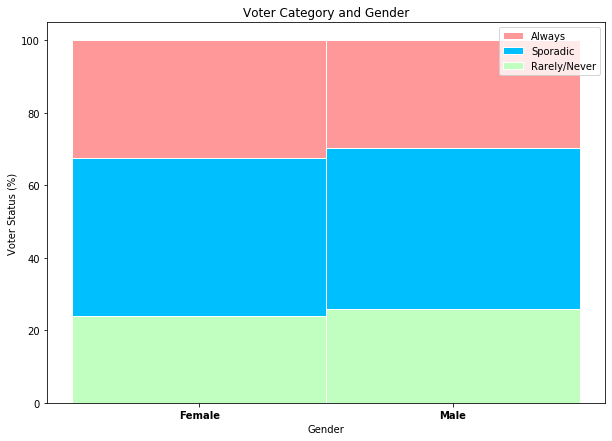

In [74]:
#voter status by demographic info
sub = data[['gender', 'voter_category']] 
dict = {}
for category in sub.voter_category.unique():
    vals = []
    categorydf = sub[sub['voter_category'] == category]
    for g in sub.gender.unique():
        gcat = categorydf[categorydf['gender'] == g]
        vals.append(len(gcat))
    dict[category] = vals

# stacked bar plot
x = sub.gender.unique()
always = np.array(dict['always'])
sporadic = np.array(dict['sporadic'])
rarely = np.array(dict['rarely/never'])
total = always+sporadic+rarely
proportion_always = np.true_divide(always, total) * 100
proportion_sporadic = np.true_divide(sporadic, total) * 100
proportion_rarely = np.true_divide(rarely, total) * 100

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
# The position of the bars on the x-axis
r = range(len(x))
barWidth = 1
#plot bars
plt.figure(figsize = (10,7))
ax1 = plt.bar(r, proportion_always, bottom = proportion_sporadic + proportion_rarely, color = colors[0], edgecolor = 'white', width = barWidth, label = 'Always')
ax3 = plt.bar(r, proportion_sporadic, bottom = proportion_rarely, color = colors[1], edgecolor = 'white', width = barWidth, label = 'Sporadic')
ax4 = plt.bar(r, proportion_rarely, color = colors[2], edgecolor = 'white', width=barWidth, label = 'Rarely/Never')
plt.legend()
plt.xticks(r, x, fontweight = 'bold')
plt.xlabel("Gender")
plt.ylabel("Voter Status (%)")
plt.title("Voter Category and Gender")
plt.show()

EDA about the poll questions:

Poll Q5: As far as making progress on the important issues facing the country, does it really
matter who wins the 2020 presidential election, or will things be pretty much the same
regardless of who is elected president?
- 1. Who wins the elction really matters
- 2. Things will be pretty much the same <br>

Its not too suprising that those who always vote think that their 2020 vote really matters. What i think is interesting is that the sporadic categroy also has a large percentage of people who think their 2020 vote really matters. It makes me wonder if this is different than in the past (will this sporadic people be more likely to vote in 2020 than past elections?). It also makes me wonder about the 'rarely/never' people. Are those rarely/never people who think their 2020 vote matters going to vote this year? Why do the people who ansered "Things will be the same" not think the election result matters?

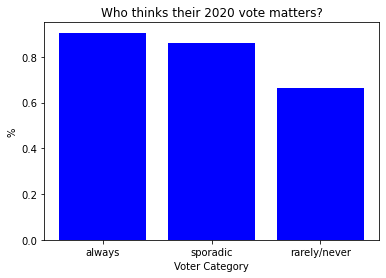

In [9]:
sub1 = data[['Q5', 'voter_category']]
sub = sub1[sub1['Q5'] == 1]

x = sub.voter_category.unique()
dict = {}
for category in sub.voter_category.unique():
    categorydf = sub[sub['voter_category'] == category]
    count = len(categorydf)
    subset = sub1[sub1['voter_category'] == category]
    percent = count / len(subset)
    dict[category] = percent

y = dict.values()    
plt.bar(x, y, color='blue')
plt.xlabel("Voter Category")
plt.ylabel("%")
plt.title("Who thinks their 2020 vote matters?")
plt.show()

Poll Q16: In general, how easy or difficult do you think it is to vote in national elections?
- 1. Very easy
- 2. Somewhat easy
- 3. Somewhat difficult
- 4. Very difficult <br>

Looking at the results of the bar plot below, it is not suprising that people who always vote have the highest percentage of people who think voting is easy. But, there are more people who rarely/never voter who think voting is easy than I would have expected. This makes me wonder why people aren't voting if they think its easy. 

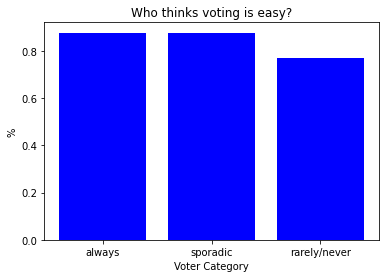

In [34]:
sub1 = data[['Q16', 'voter_category']]
sub = sub1[sub1['Q16'] != 3]
sub = sub[sub['Q16'] != 4] #subset the data to only include people who answered easy or somewhat easy

x = sub.voter_category.unique()
dict = {}
for category in sub.voter_category.unique():
    categorydf = sub[sub['voter_category'] == category]
    count = len(categorydf)
    subset = sub1[sub1['voter_category'] == category]
    percent = count / len(subset)
    dict[category] = percent

y = dict.values()    
plt.bar(x, y, color='blue')
plt.xlabel("Voter Category")
plt.ylabel("%")
plt.title("Who thinks voting is easy?")
plt.show()

Poll Q20: Are you currently registered to vote?
- 1. Yes
- 2. No <br>

Lots of sporadic people are registered to vote, but why aren't they always voting? Over 60% of those who rarely/never vote are registered. What is stopping them from voting?

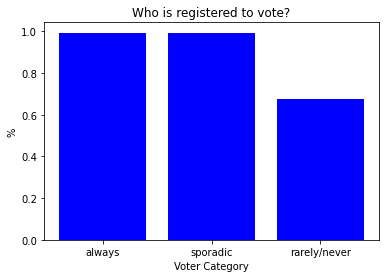

In [36]:
sub1 = data[['Q20', 'voter_category']]
sub = sub1[sub1['Q20'] == 1]

x = sub.voter_category.unique()
dict = {}
for category in sub.voter_category.unique():
    categorydf = sub[sub['voter_category'] == category]
    count = len(categorydf)
    subset = sub1[sub1['voter_category'] == category]
    percent = count / len(subset)
    dict[category] = percent

y = dict.values()    
plt.bar(x, y, color='blue')
plt.xlabel("Voter Category")
plt.ylabel("%")
plt.title("Who is registered to vote?")
plt.show()

Poll Q29: Thinking back to the last few national elections where you decided not to vote, which of the following were the most important reasons in your decision not to vote? Please choose all that apply.
- 1. I didn’t like any of the candidates
- 2. Because of where I live, my vote doesn’t matter
- 3. No matter who wins, nothing will change for people like me
- 4. Our system is too broken to be fixed by voting
 -5. I wanted to vote, but I didn’t have time, couldn’t get off work, something came up, or I
forgot
- 6. I’m not sure if I can vote
- 7. Nobody talks about the issues that are important to me personally
- 8. All the candidates are the same
- 9. I don’t believe in voting
- 10. Other [specify] [A]

<br> 
one interesting thing we noticed when doing this EDA was that there were NA's in this question, even when subsetting for only the 'rarely/never' voters. This means that there is a disconnect between what people are answering in the polls about the amoutn they vote versus the metadata that fivethirtyeight has about the individuals voter category. <br>
Also, looking at the bar graph we can see that q29_3 has the highest number. This question is people who said they did not vote because "No matter who wins, nothing will change for people like me".

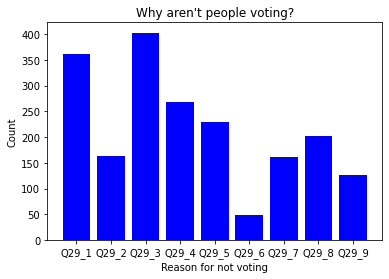

In [49]:
sub1 = data[['Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'voter_category']]
sub = sub1[sub1['voter_category']== 'rarely/never']

x = ['Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9']
dict = {}
for q in x:
    count = sum(sub1[q]== 1.0)
    dict[q] = count

y = dict.values()    
plt.bar(x, y, color='blue')
plt.xlabel("Reason for not voting")
plt.ylabel("Count")
plt.title("Why aren't people voting?")
plt.show()